In [ ]:
# notes
#Order
#1) Read 1
#2) Index 1
#3) Index 2
#4) Read 2

#line numbers is how they are mathcing up. match by x and y position
#barcode all 8 nucleotides
#all reads are 101 bp long

In [ ]:
#Part 1.1
# make a table
'''1294_S1_L008_R1_001.fastq.gz
Read 1
1294_S1_L008_R2_001.fastq.gz
Index 1
1294_S1_L008_R3_001.fastq.gz
Index 2
1294_S1_L008_R4_001.fastq.gz
Read 2
'''
# PWD /projects/bgmp/mdriskil
# making smaller files
#zcat 1294_S1_L008_R1_001.fastq.gz | head -52 > /projects/bgmp/mdriskil/test_1294_S1_L008_R1_001.fastq
#zcat 1294_S1_L008_R2_001.fastq.gz | head -52 > /projects/bgmp/mdriskil/test_1294_S1_L008_R2_001.fastq
#zcat 1294_S1_L008_R3_001.fastq.gz | head -52 > /projects/bgmp/mdriskil/test_1294_S1_L008_R3_001.fastq
#zcat 1294_S1_L008_R4_001.fastq.gz | head -52 > /projects/bgmp/mdriskil/test_1294_S1_L008_R4_001.fastq



In [ ]:
# getting clone and making a branch 
# git clone https://github.com/2018-BGMP/demultiplexing-mandiedriskill
# cd demultiplexing-mandiedriskill/
# git checkout -b mandiedriskill

# moving files to working branch 
# scp mdriskil@talapas-ln1.uoregon.edu:/projects/bgmp/mdriskil/test_1294_S1_*.fastq .



In [13]:
# PART 1.2
# This is the code that doesn't include numpy, this will take a long time
file = "/Users/mandiedriskill/GitHub/2018_Bi621/demultiplexing-mandiedriskill/test_1294_S1_L008_R1_001.fastq"
def populate_array(file):
    with open(file, "r") as fh:
        mean_scores = []
        for elm in range(101):
            mean_scores.append(0.0)
        LN=0
        for line in fh:
            LN+=1 #this will bing out one line
            line = line.strip('\n')
            if LN% 4 == 0 :
                #print(len(line)) 
                #print(line)
                ctr = 0  
                for char in line:
                    temp_phred = ord(char)-33
                    mean_scores[ctr] += temp_phred  
                    ctr += 1
                #print (mean_scores)
        return mean_scores, LN
        
    
mean_scores, LN = populate_array(file)
print("# Base Pair\tMean Quality Score")
for ctr, num in enumerate(mean_scores):
    temp_mean = mean_scores[ctr]/(LN/4)
    mean_scores[ctr] = float(temp_mean)
    print (ctr, mean_scores[ctr], sep="\t ")


# Base Pair	Mean Quality Score
0	 30.46153846153846
1	 2.0
2	 31.615384615384617
3	 29.692307692307693
4	 33.92307692307692
5	 36.69230769230769
6	 39.38461538461539
7	 40.07692307692308
8	 41.0
9	 39.92307692307692
10	 40.07692307692308
11	 40.69230769230769
12	 40.69230769230769
13	 40.69230769230769
14	 41.0
15	 40.07692307692308
16	 41.0
17	 41.0
18	 38.15384615384615
19	 40.69230769230769
20	 40.38461538461539
21	 41.0
22	 40.30769230769231
23	 41.0
24	 39.38461538461539
25	 38.92307692307692
26	 39.23076923076923
27	 38.30769230769231
28	 40.69230769230769
29	 40.69230769230769
30	 38.53846153846154
31	 40.69230769230769
32	 40.07692307692308
33	 39.30769230769231
34	 38.15384615384615
35	 40.69230769230769
36	 40.07692307692308
37	 37.53846153846154
38	 37.92307692307692
39	 39.76923076923077
40	 35.76923076923077
41	 37.15384615384615
42	 39.61538461538461
43	 38.15384615384615
44	 40.0
45	 37.0
46	 39.30769230769231
47	 40.30769230769231
48	 41.0
49	 40.38461538461539
50	 40.0

In [9]:
# Need to call array in another cell
populate_array(file)


A#A-<FJJJ<JJJJJJJJJJJJJJJJJFJJJJFFJJFJJJAJJJJ-AJJJJJJJFFJJJJJJFFA-7<AJJJFFAJJJJJF<F--JJJJJJF-A-F7JJJJ
A#AAFJJJJJJJJJJFJJJJJJJJJJJJJJJJJJJJJJJJFJJJJJJJJJJJJJJAJJJJJJJJJJJJJJFJJJJJFFFFJJJJJJJJJJJJJJJJJJ77F
A#AFFFJFJJFJJJJFJJJJJJJJAJJFJJJJJFJFJ7<FAFJJFJFJJFJFJJJFJAAJJJFJJJJJJJJJJJJJJJAJJJFAJJJJJFFJJJAJJJ<F-
A#<AAFJFJJJJFJJFJJ7JFJJJFJFAJJ<FF<<JJ<JJ<F<JJFAJJFFFJJJJJJA--77FJ--<<-AA<<AFJJJJJJFJJJFFFJ-<7--7-FFFA
A#A-FJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJFJJFJFJFJJJJJJJJJJFFJJJJJJFJJJJJJJJJJJJJJJJJJFJ<FJJAFJJJF<J7FJJJF
-#AAFAAFJJFJJJJJJJJJJJJJF77<JJ<JFJAJFJFFA-F-A7JAJJJA<FAFFJJJFAFJF<FJJ-FAJFJJJJ<AJFJFFJJJJA-F-<AAA<FJJ
A#AFF<FJJJJJJJJJJJJJJJJJJFJJJJJJJJJJJJ<JAJJJJJJJJJJJJJJJJJJJFJJJJJJJJJJJJJJJJJJFJJJJJJ-AJJJAJJFJJJFJF
A#AF<FFJJJFFJJJJJJJJJJJJJJJFJJJJJJJJJFFJJJJJJJJJJJJJJJJJAJAJJJJJFJJFJJJJJJJJJJJJJJ<JFJJJFJJFJFJJJJAJJ
A#AAFFJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJAJJJJJJJJJJJFJJJ<JJJJJJJJJJJ<JJJJJJJFJ
A#AAAJJJJJJJJFJJJJFJJJJJFFJJJJJJJJJJJFFJ<JJFJJJJJJJFJJJJJJJJJJFJJJJJJJJJJJJJJJFJJ-

In [14]:
# PART 2.a
# This is the code that include numpy, this will take a shorter time
import numpy as np
an_array = np.zeros((101),dtype=float)# first number down, second number accross
#print("my array is", an_array)
an_array[0]

with open("/Users/mandiedriskill/GitHub/2018_Bi621/demultiplexing-mandiedriskill/test_1294_S1_L008_R1_001.fastq", "r") as fh:
    
    LN=0
    for line in fh:
        LN+=1 #this will bing out one line
        line = line.strip('\n')

        if LN% 4 == 0 : 
            #print(line)
            for pos in range(len(line)):# this is an integer going to 100, this is inner index loops
                #print(line_seq,pos,line[pos], end = " ")
                #print(pos)
                #print(seq_count)
                an_array[pos] += ord(line[pos])-33 # populating the numbers in the array. 
    #print(an_array)
    an_array = an_array/(LN/4)
    #print(an_array)
print("# Base Pair\tMean")
for cnt in range(101): #
    print(cnt, an_array[cnt], sep = "\t")

# Base Pair	Mean
0	30.46153846153846
1	2.0
2	31.615384615384617
3	29.692307692307693
4	33.92307692307692
5	36.69230769230769
6	39.38461538461539
7	40.07692307692308
8	41.0
9	39.92307692307692
10	40.07692307692308
11	40.69230769230769
12	40.69230769230769
13	40.69230769230769
14	41.0
15	40.07692307692308
16	41.0
17	41.0
18	38.15384615384615
19	40.69230769230769
20	40.38461538461539
21	41.0
22	40.30769230769231
23	41.0
24	39.38461538461539
25	38.92307692307692
26	39.23076923076923
27	38.30769230769231
28	40.69230769230769
29	40.69230769230769
30	38.53846153846154
31	40.69230769230769
32	40.07692307692308
33	39.30769230769231
34	38.15384615384615
35	40.69230769230769
36	40.07692307692308
37	37.53846153846154
38	37.92307692307692
39	39.76923076923077
40	35.76923076923077
41	37.15384615384615
42	39.61538461538461
43	38.15384615384615
44	40.0
45	37.0
46	39.30769230769231
47	40.30769230769231
48	41.0
49	40.38461538461539
50	40.0
51	39.38461538461539
52	39.61538461538461
53	40.69230769230769
5

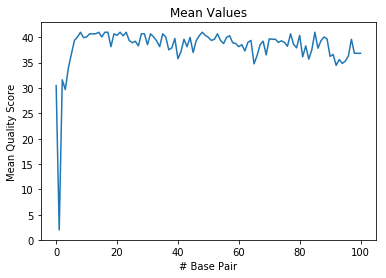

In [38]:
#this is the mean graph
% matplotlib inline
import matplotlib.pyplot as plt
plt.plot(an_array)
plt.xlabel("# Base Pair")
plt.ylabel("Mean Quality Score")
plt.title("Mean Values")
plt.show()

In [ ]:
#/projects/bgmp/shared/2017_sequencing/1294_S1_L008_R1_001.fastq.gz

#!/usr/bin/env python3

#Load modules
#module spider python3
#module load python3/3.6.5








In [ ]:
#Creating a slurm to run a batch on talapas
!/usr/bin/env bash
SBATCH --partition=long    ### Partition
SBATCH --job-name=PS6job  ### Job Name
SBATCH --output=PS6job.out    ### File in which to store job output
SBATCH --time=1-00:00:00   ### Wall clock time limit in Days-HH:MM:SS
SBATCH --nodes=1           ### Number of nodes needed for the job
SBATCH --ntasks-per-node=14 ### Number of tasks to be launcged per Node

cd /projects/bgmp/mdriskil
module load python3/3.6.5
./demultiplexting_part1

In [ ]:
# Running the job
#sbatch demultiplexing.slurm
#squeue -u mdriskil

In [ ]:
# Actual code ran on talapas for the Job


# !/usr/bin/env python3

# import numpy as np
# an_array = np.zeros((101),dtype=float)# first number down, second number accross
# #print("my array is", an_array)
# an_array[0]

# import gzip
# file = "/projects/bgmp/mdriskil/test_1294_S1_L008_R1_001.fastq"
# with gzip.open(file, "rt") as fh:

#     LN=0
#     for line in fh:
#         LN+=1 #this will bing out one line
#         line = line.strip('\n')

#         if LN% 4 == 0 :
#             #print(line)
#             for pos in range(len(line)):# this is an integer going to 100, this is inner index loops
#                 #print(line_seq,pos,line[pos], end = " ")
#                 #print(pos)
#                 #print(seq_count)
#                 an_array[pos] += ord(line[pos])-33 # populating the numbers in the array.
#     #print(an_array)
#     an_array = an_array/(LN/4)
#     #print(an_array)
# print("# Base Pair\tMean")
# for cnt in range(101): #
#     print(cnt, an_array[cnt])
    
# import matplotlib.pyplot as plt
# plt.plot(an_array)
# plt.xlabel("# Base Pair")
# plt.ylabel("Mean Quality Score")
# plt.title("1294_S1_L008_R1_001.fastq")


# plt.savefig("test_1294_S1_L008_R1_001.fastq_mean")



In [ ]:
#Part 2.c
#for test file
#cat test_1294_S1_L008_R2_001.fastq | grep -A1 "^@" | grep -v "^--" | grep -v "^@" | grep "N" |wc -l

#for real files
#zcat 1294_S1_L008_R2_001.fastq | grep -A1 "^@" | grep -v "^--" | grep -v "^@" | grep "N" |wc -l
# number of reads for index 1 with a "N" 3,976,613

#zcat 1294_S1_L008_R3_001.fastq | grep -A1 "^@" | grep -v "^--" | grep -v "^@" | grep "N" |wc -l
# number of reads for index 1 with a "N" 3,328,051

